In [37]:
import kagglehub
import os
# Download latest version
path_of_dir = kagglehub.dataset_download("dmitrybabko/speech-emotion-recognition-en")

print("Path to dataset files:", path_of_dir)

Path to dataset files: C:\Users\Dipam1\.cache\kagglehub\datasets\dmitrybabko\speech-emotion-recognition-en\versions\1


In [38]:
Ravdess_path = path_of_dir + "/Ravdess/audio_speech_actors_01-24/"
Tess_path = path_of_dir + "/Tess/"
Savee_path = path_of_dir + "/Savee/"
Crema_path = path_of_dir + "/Crema/"

Ravdess_dir_list = os.listdir(Ravdess_path)
Tess_dir_list = os.listdir(Tess_path)
Crema_dir_list = os.listdir(Crema_path)
Savee_dir_list = os.listdir(Savee_path)

Import Modules

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Audio
import librosa

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
from keras import regularizers
from keras.layers import BatchNormalization

In [40]:
map_dir = {
    "SAD": "sad",
    "ANG": "angry",
    "DIS": "disgust",
    "FEA": "fear",
    "HAP": "happy",
    "NEU": "neutral"
}

map_dir_savee = {
    'a': 'angry',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happy',
    'n': 'neutral',
    'sa': 'sad',
    'su': 'surprise'
}

ravness_emotion = {
    "1": "neutral", 
    "2": "calm", 
    "3": "happy", 
    "4": "sad", 
    "5": "angry", 
    "6": "fearful", 
    "7": "disgust", 
    "8": "surprised"
}

In [41]:
label = []
path = []

for it in Crema_dir_list:
    file_path = Crema_path + it
    path.append(file_path)
    lab = file_path.split("_")[2]
    label.append(map_dir.get(lab))

In [42]:
for it in Savee_dir_list:
    file_path = os.path.join(Savee_path + it)
    path.append(file_path)
        # lab = file_path.split("_")[1]
        # label.append(map_dir_savee.get(lab.split(".")[0][:1]))

    part = file_path.split('_')[1]
    part = part[:-6]
    if part == 'a':
        label.append('angry')
    elif part == 'd':
        label.append('disgust')
    elif part == 'f':
        label.append('fear')
    elif part == 'h':
        label.append('happy')
    elif part == 'n':
        label.append('neutral')
    elif part == 'sa':
        label.append('sad')
    elif part == 'su':
        label.append('surprise')
    else:
        label.append('Unknown')

In [43]:
for it in Tess_dir_list:
    directories = os.listdir(Tess_path + '/' + it)
    for file in directories:
        part_emotion = file.split('.')[0]
        part_emotion = part_emotion.split('_')[2]
        
        if part_emotion=='ps':
            label.append('surprise')
        else:
            label.append(part_emotion)
        path.append(Tess_path + it + '/' + file)

In [44]:
for it in Ravdess_dir_list:
    # There are 20 actors  
    actor = os.listdir(Ravdess_path + it)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        label.append(ravness_emotion.get(int(part[2])))
        path.append(Ravdess_path + it + '/' + file)

In [45]:
print(len(path), " & ", len(label))

12162  &  12162


In [46]:
label[:5]

['angry', 'disgust', 'fear', 'happy', 'neutral']

## Feature Extraction and Transformation

In [47]:
def convert_into_vector(sound):
    y, sr = librosa.load(sound, duration = 3, offset = 0.5)
    
    mfccs = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfccs

In [48]:
df = pd.DataFrame()
df["speech"] = path
df["label"] = label

In [49]:
df.head(10)

,speech,label
0,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,angry
1,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,disgust
2,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,fear
3,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,happy
4,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,neutral
5,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,sad
6,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,angry
7,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,angry
8,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,angry
9,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,disgust


In [50]:
Audio(data=df["speech"][0])

In [51]:
df["label"].value_counts()

label
angry       1731
disgust     1731
fear        1731
happy       1731
sad         1731
neutral     1607
surprise     460
Name: count, dtype: int64

<Axes: xlabel='label'>

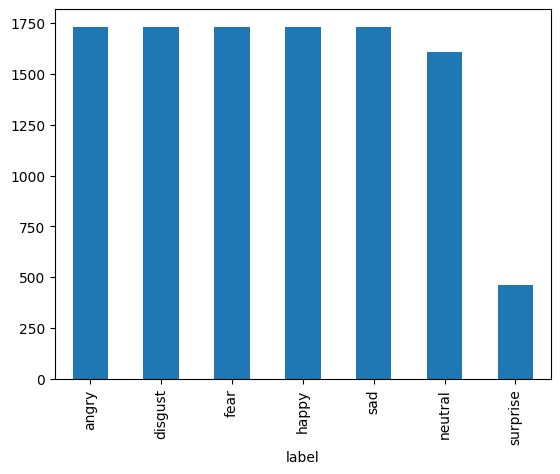

In [52]:
df['label'].value_counts().plot(kind='bar')

In [53]:
df["label_encoder"] = df["speech"].apply(convert_into_vector)

In [54]:
df.tail(10)

,speech,label,label_encoder
12152,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-439.75397, 44.14115, -33.67789, -7.4707985, ..."
12153,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-428.63486, 34.94966, -26.84122, -4.41798, -2..."
12154,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-647.23883, 35.205482, -3.563608, 0.5517826, ..."
12155,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-539.6659, 39.459244, -17.748028, -4.1263456,..."
12156,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-570.8283, 34.65994, -11.941212, 1.2944325, -..."
12157,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-554.5564, 28.57404, -20.387833, -1.9823033, ..."
12158,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-472.07373, 49.37256, -19.427317, -7.9314837,..."
12159,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-477.47406, 38.98995, -24.028767, -4.061716, ..."
12160,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-444.8197, 29.430105, -7.319829, 2.1825602, -..."
12161,C:\Users\Dipam1\.cache\kagglehub\datasets\dmit...,None,"[-485.24686, 34.517685, -2.6824563, -2.7403817..."


In [55]:
df["label"].isnull().sum() # checking for null values

np.int64(1440)

In [56]:
df.dropna(subset=["label"], inplace=True)

In [57]:
df["label"].isnull().sum()

np.int64(0)

### Splitting the values for model training

In [188]:
np.array([df["label_encoder"]]).shape

(1, 10722)

In [146]:
X = [x for x in df["label_encoder"]]
X = np.array(X)
X.shape

(10722, 40)

In [139]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [145]:
# sc.fit_transform(X)
# X = np.expand_dims(X, -1) # Reshape dataset for DNN

In [147]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()

In [148]:
print("X.shape = ", X.shape, " y.shape = ", y.shape)

X.shape =  (10722, 40)  y.shape =  (10722, 7)


## spliting dataset

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [153]:
X_train_reshape = sc.fit_transform(X_train)
X_test_reshape = sc.transform(X_test)

In [155]:
print("X_train_reshape.shape = ", X_train_reshape.shape, " X_test_reshape.shape = ", X_test_reshape.shape)
X_train_reshape = np.expand_dims(X_train_reshape, -1) # Reshape dataset for DNN
X_test_reshape = np.expand_dims(X_test_reshape, -1) # Reshape dataset for DNN
print("X_train_reshape.shape = ", X_train_reshape.shape, " X_test_reshape.shape = ", X_test_reshape.shape)

X_train_reshape.shape =  (8577, 40)  X_test_reshape.shape =  (2145, 40)
X_train_reshape.shape =  (8577, 40, 1)  X_test_reshape.shape =  (2145, 40, 1)


In [157]:
print(X_train.shape, "--", y_train.shape)

(8577, 40) -- (8577, 7)


In [164]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(40,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(7, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,015 (355.53 KB)

 Trainable params: 90,503 (353.53 KB)

 Non-trainable params: 512 (2.00 KB)

In [165]:
# Train the model
import keras
es = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

history = model.fit(X_train_reshape, y_train, validation_split=0.2, epochs=100, callbacks= es)

Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2395 - loss: 1.8324 - val_accuracy: 0.4860 - val_loss: 1.3957
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4409 - loss: 1.4036 - val_accuracy: 0.5221 - val_loss: 1.1617
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5085 - loss: 1.2357 - val_accuracy: 0.5280 - val_loss: 1.1263
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5225 - loss: 1.1723 - val_accuracy: 0.5385 - val_loss: 1.1165
Epoch 5/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5213 - loss: 1.1595 - val_accuracy: 0.5420 - val_loss: 1.0941
Epoch 6/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5545 - loss: 1.1007 - val_accuracy: 0.5548 - val_loss: 1.0801
Epoch 7/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5548 - loss: 1.1066 - val_accuracy: 0.5536 - val_loss: 1.0850
Epoch 8/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5580 - loss: 1.1022 - val_accu

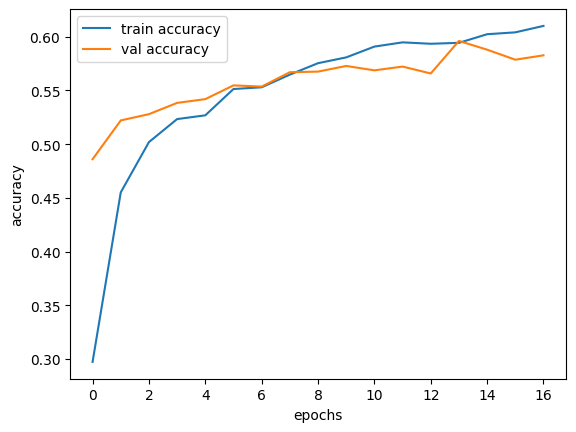

In [166]:
epochs = list(range(17))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [167]:
y_pred = model.predict(X_test_reshape)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [168]:
from sklearn.metrics import classification_report

# Convert one-hot encoded arrays to class indices
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       360
           1       0.62      0.37      0.46       334
           2       0.63      0.49      0.55       328
           3       0.50      0.57      0.53       339
           4       0.55      0.63      0.59       333
           5       0.58      0.76      0.66       363
           6       0.85      0.94      0.89        88

    accuracy                           0.61      2145
   macro avg       0.64      0.64      0.63      2145
weighted avg       0.62      0.61      0.60      2145



## Predict output for the model

In [193]:
df["speech"][9014]

'C:\\Users\\Dipam1\\.cache\\kagglehub\\datasets\\dmitrybabko\\speech-emotion-recognition-en\\versions\\1/Tess/OAF_Pleasant_surprise/OAF_lose_ps.wav'

In [194]:
# audio_file = 'human-voice-saying-oh-no-301694.mp3'abs
audio_file = df["speech"][9014]
mfcc_ = convert_into_vector(audio_file)
mfcc_ = (np.array([mfcc_]))
mfcc = sc.transform(mfcc_)

# Reshape the feature vector to add batch and channel dimensions (batch_size, timesteps, features)
input_data = mfcc.reshape(1, 40, 1)

predictions = model.predict(input_data)
predicted_class = np.argmax(predictions, axis=1)[0]

class_labels = {0: "angry", 1: "disgust", 2: "fear", 3: "happy", 4: "neutral", 5: "sad",6:"surprise"}

print("Predicted emotion:", class_labels.get(predicted_class, "Unknown"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted emotion: surprise
